In [62]:
import pandas as pd
import numpy as np

%matplotlib inline

## [Pandas](http://pandas.pydata.org/)
* DataFrame
* Series

In [63]:
sq = pd.Series({'row1': 'row1 col a', 'row 2': 'row2 col a'})
sq

row 2    row2 col a
row1     row1 col a
dtype: object

In [64]:
sq.index

Index(['row 2', 'row1'], dtype='object')

In [72]:
df = pd.DataFrame(
    {
     'column_a': {'row1': 'row1 col a', 'row 2': 'row2 col a'}, 
     'column_b': {'row1': 'row1 col b', 'row 2': 'row2 col b'}, 
    })
df

,column_a,column_b
row 2,row2 col a,row2 col b
row1,row1 col a,row1 col b


In [73]:
df.index

Index(['row 2', 'row1'], dtype='object')

In [74]:
df.columns

Index(['column_a', 'column_b'], dtype='object')

In [75]:
df.columns = ['new_column_a', 'new_column_b']
df

,new_column_a,new_column_b
row 2,row2 col a,row2 col b
row1,row1 col a,row1 col b


In [76]:
print(type(df.new_column_a))
df.new_column_a

<class 'pandas.core.series.Series'>


row 2    row2 col a
row1     row1 col a
Name: new_column_a, dtype: object

In [9]:
type(df.new_column_a)

pandas.core.series.Series

In [77]:
print(type(df.new_column_a.values))
df.new_column_a.values

<class 'numpy.ndarray'>


array(['row2 col a', 'row1 col a'], dtype=object)

## Read data
Let's read data from train.csv file into memory (assign to `df` variable in our case)

In [78]:
df = pd.read_csv('train.csv')

## Questions:

1. How many objects (rows) and features (columns) are there?
2. What the name and type of features (columns)?
3. Are there missing values?
4. How many memory is use for keep this data in RAM?

Let's use `.info()` to find the answer

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


1. `RangeIndex: 10886 entries, 0 to 10885` => there're **10886 rows** (objects)
2. `Data columns (total 12 columns):` => there're **12 columns** (features)
3. `dtypes: float64(3), int64(8), object(1)` => three types (float, int, object)
4. `memory usage: 1020.6+ KB` => use about 1MB
5. There are not missing data (because each column has the same number non-missing values)

In [80]:
print("count samples & features: ", df.shape)
print("Are there missing values: ", df.isnull().any().any())

count samples & features:  (10886, 12)
Are there missing values:  False


## Questions

1. How data looks like?
2. Are there categorical variables?
3. The categorical variables have high or low cardinality (how many unique values they have)?
4. Can we optimize memory usage?

In [87]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [88]:
df.season.unique()
#df[''].unique()

array([1, 2, 3, 4])

In [92]:
df.season.nunique()

4

In [93]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [95]:
for column in df.columns:
    print(column, df[column].nunique())

datetime 10886
season 4
holiday 2
workingday 2
weather 4
temp 49
atemp 60
humidity 89
windspeed 28
casual 309
registered 731
count 822


## Categorical variables:
* season: 4 unique values
* holiday: 2 (binary)
* workingday: 2 (binary)
* weather: 4

In [97]:
df.holiday.unique()

array([0, 1])

In [96]:
df[ ['holiday'] ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 1 columns):
holiday    10886 non-null int64
dtypes: int64(1)
memory usage: 85.1 KB


In [98]:
df['holiday'] = df['holiday'].astype('int8')
df[ ['holiday'] ].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 1 columns):
holiday    10886 non-null int8
dtypes: int8(1)
memory usage: 10.7 KB


In [102]:
def optimize_memory(df):
    for cat_var in ['holiday', 'weather', 'season', 'workingday']:
        df[cat_var] = df[cat_var].astype('int8')

    for float_var in ['temp', 'atemp', 'windspeed']:
        df[float_var] = df[float_var].astype('float16')


    for int_var in ['casual', 'registered', 'count']:
        df[int_var] = df[int_var].astype('int16')
        
    return df

df = optimize_memory(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int8
holiday       10886 non-null int8
workingday    10886 non-null int8
weather       10886 non-null int8
temp          10886 non-null float16
atemp         10886 non-null float16
humidity      10886 non-null int64
windspeed     10886 non-null float16
casual        10886 non-null int16
registered    10886 non-null int16
count         10886 non-null int16
dtypes: float16(3), int16(3), int64(1), int8(4), object(1)
memory usage: 340.3+ KB


## Working with date

In [103]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int8
holiday       10886 non-null int8
workingday    10886 non-null int8
weather       10886 non-null int8
temp          10886 non-null float16
atemp         10886 non-null float16
humidity      10886 non-null int64
windspeed     10886 non-null float16
casual        10886 non-null int16
registered    10886 non-null int16
count         10886 non-null int16
dtypes: datetime64[ns](1), float16(3), int16(3), int64(1), int8(4)
memory usage: 340.3 KB


In [105]:
df = pd.read_csv('train.csv', parse_dates=['datetime'])

df = optimize_memory(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int8
holiday       10886 non-null int8
workingday    10886 non-null int8
weather       10886 non-null int8
temp          10886 non-null float16
atemp         10886 non-null float16
humidity      10886 non-null int64
windspeed     10886 non-null float16
casual        10886 non-null int16
registered    10886 non-null int16
count         10886 non-null int16
dtypes: datetime64[ns](1), float16(3), int16(3), int64(1), int8(4)
memory usage: 340.3 KB


## Understand Data
https://www.kaggle.com/c/bike-sharing-demand/data

- **datetime** - hourly date + timestamp  
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- **holiday** - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather** -   
    1: Clear, Few clouds, Partly cloudy, Partly cloudy  
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

In [107]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.843750,14.398438,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.023438,13.632812,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.023438,13.632812,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.843750,14.398438,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.843750,14.398438,75,0.0,0,1,1


## Questions:
1. What is target variable (should be predicted)?
2. What the difference between **count**, **registered** and **casual**?

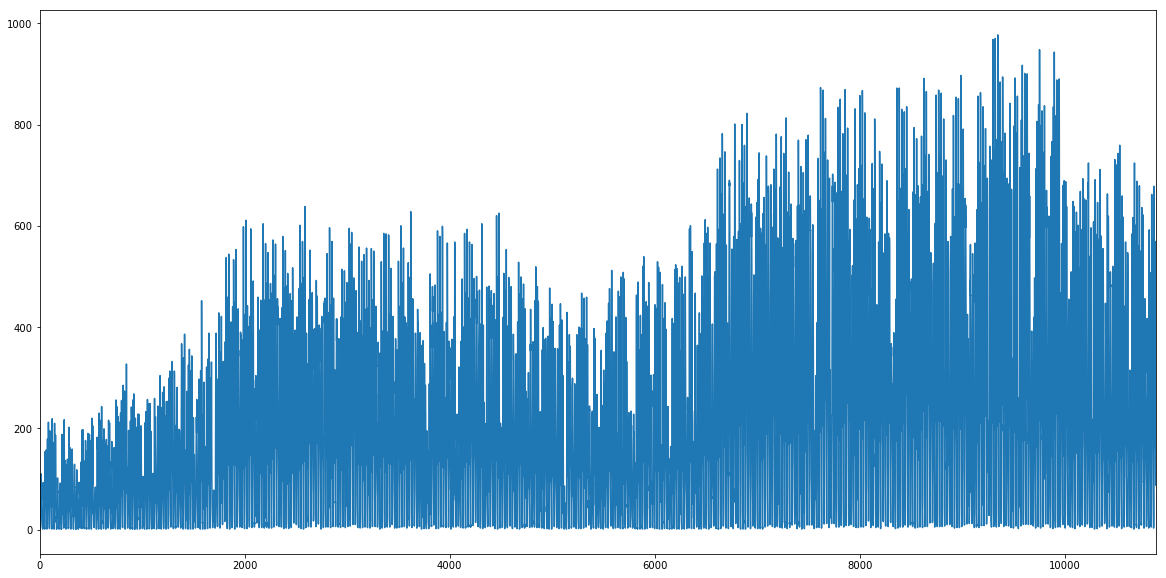

In [110]:
df['count'].plot(figsize=(20, 10));

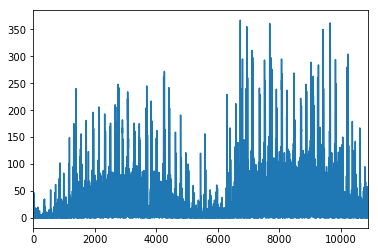

In [111]:
df['casual'].plot()

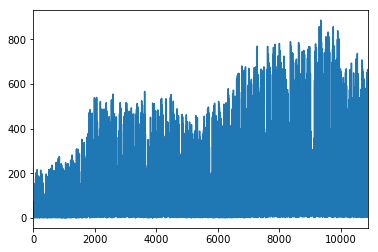

In [113]:
df['registered'].plot()

In [118]:
(df['count'] == df['casual'] + df['registered']).all()

True

## Extract day, month, year... from datetime

In [119]:
df.datetime.map(lambda x: x.day)

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        2
25        2
26        2
27        2
28        2
29        2
         ..
10856    18
10857    18
10858    18
10859    18
10860    18
10861    18
10862    19
10863    19
10864    19
10865    19
10866    19
10867    19
10868    19
10869    19
10870    19
10871    19
10872    19
10873    19
10874    19
10875    19
10876    19
10877    19
10878    19
10879    19
10880    19
10881    19
10882    19
10883    19
10884    19
10885    19
Name: datetime, Length: 10886, dtype: int64

In [120]:
df.datetime.dt.hour

0         0
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10
11       11
12       12
13       13
14       14
15       15
16       16
17       17
18       18
19       19
20       20
21       21
22       22
23       23
24        0
25        1
26        2
27        3
28        4
29        6
         ..
10856    18
10857    19
10858    20
10859    21
10860    22
10861    23
10862     0
10863     1
10864     2
10865     3
10866     4
10867     5
10868     6
10869     7
10870     8
10871     9
10872    10
10873    11
10874    12
10875    13
10876    14
10877    15
10878    16
10879    17
10880    18
10881    19
10882    20
10883    21
10884    22
10885    23
Name: datetime, Length: 10886, dtype: int64

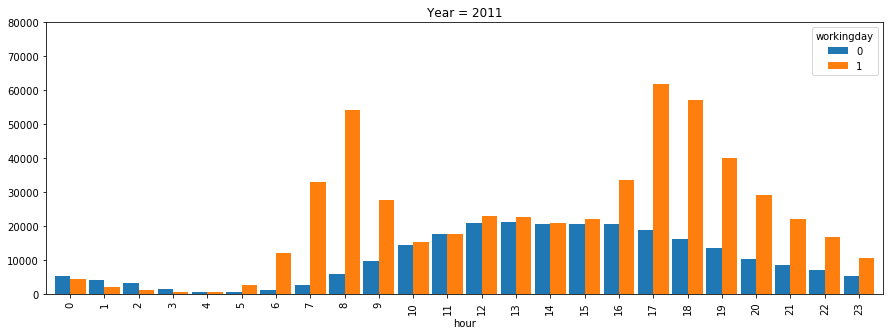

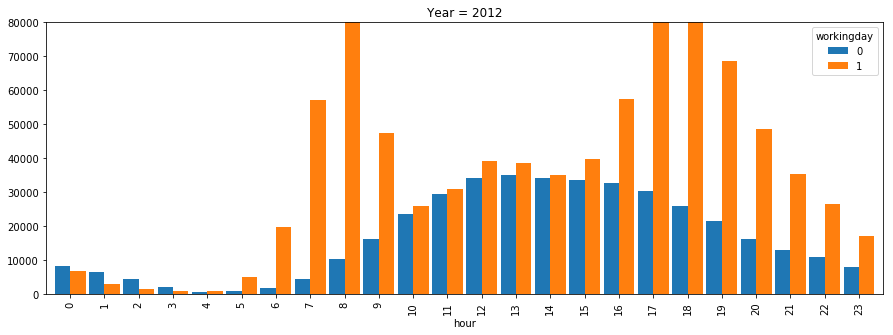

In [122]:
def plot_by_hour(data, year=None, agg='sum'):
    data['hour'] = data.datetime.dt.hour
    dd = data[ data.datetime.dt.year == year ] if year else data
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year))


plot_by_hour(df, year=2011)
plot_by_hour(df, year=2012);

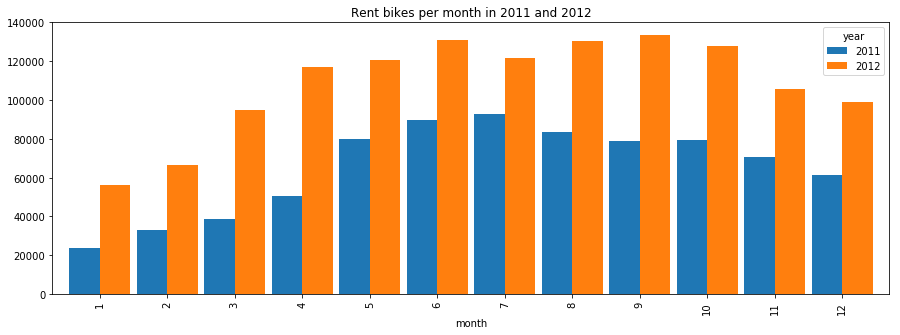

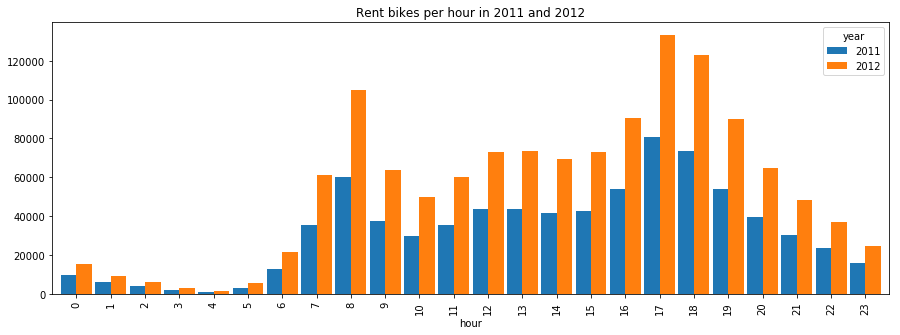

In [123]:
def plot_by_year(data, agg_attr, title):
    data['year'] = data.datetime.dt.year
    data['month'] = data.datetime.dt.month
    data['hour'] = data.datetime.dt.hour
    
    by_year = data.groupby([agg_attr, 'year'])['count'].agg('sum').unstack()
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)


plot_by_year(df, 'month', "Rent bikes per month in 2011 and 2012")
plot_by_year(df, 'hour', "Rent bikes per hour in 2011 and 2012");

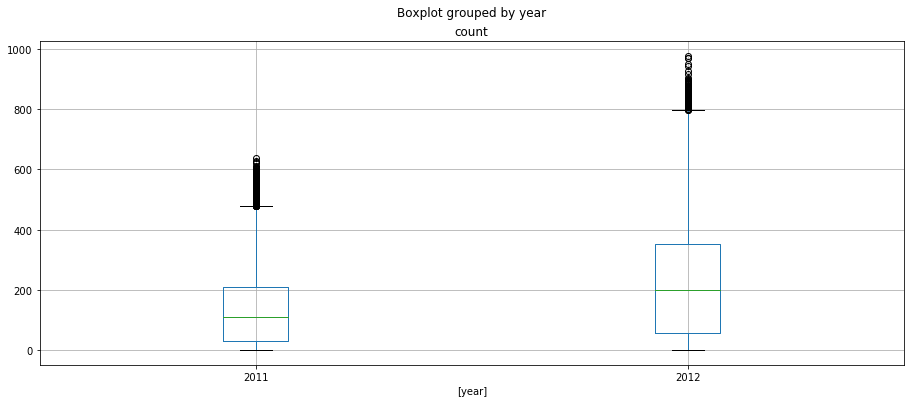

In [124]:
df[ ['count', 'year'] ].boxplot(by="year", figsize=(15, 6));

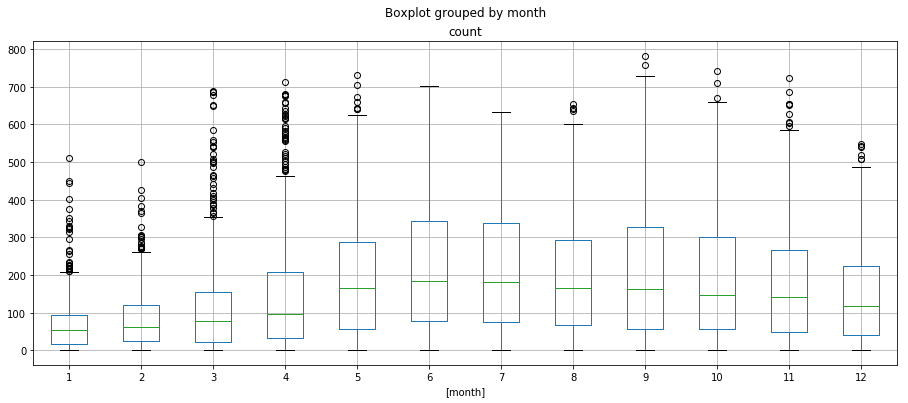

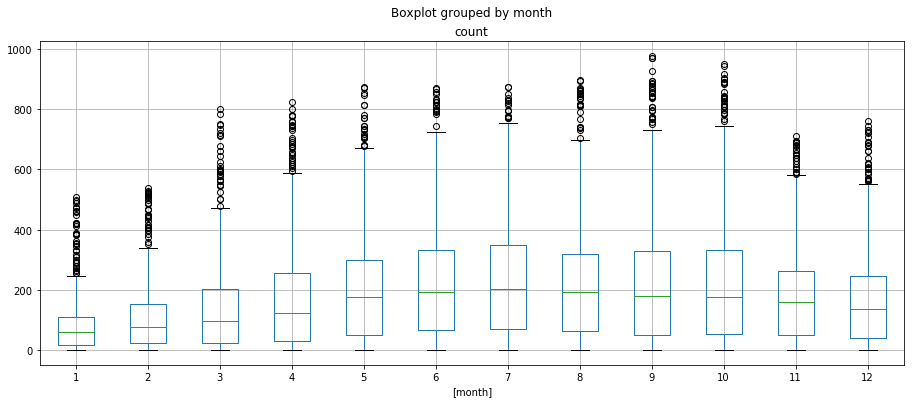

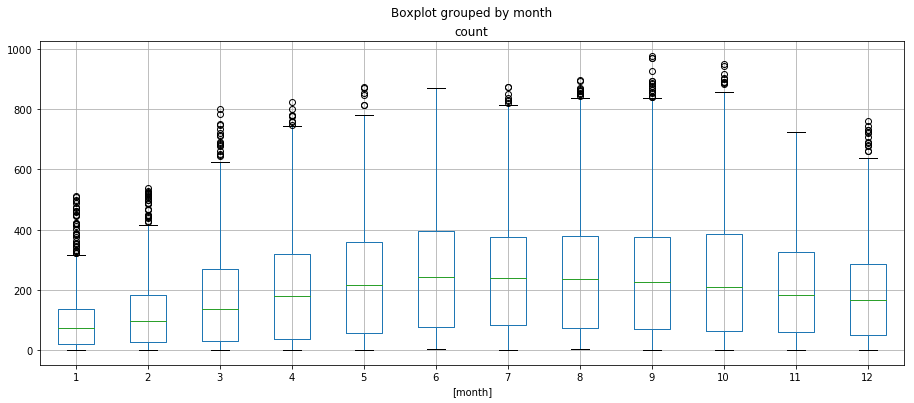

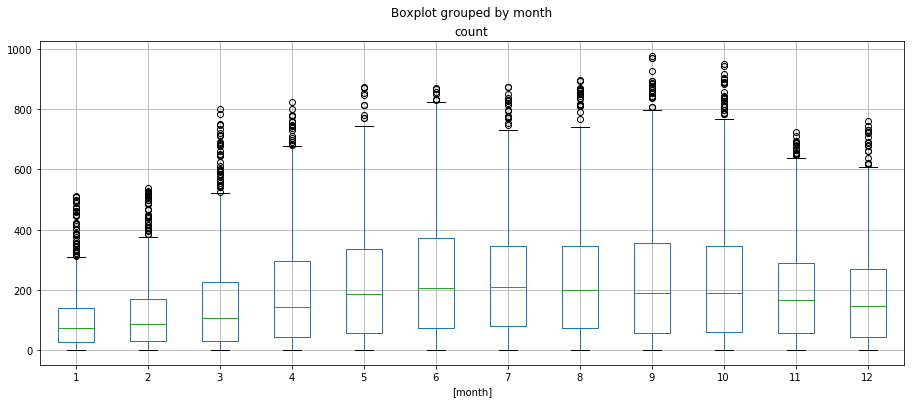

In [125]:
for year in [2011, 2012]:
    for workingday in [0, 1]:
        dd = df[ (df.datetime.dt.year == year) | (df.workingday == workingday) ]
        dd[ ['count', 'month'] ].boxplot(by="month", figsize=(15, 6));

## Mapping
### Weather 
1. **Clear**, Few clouds, Partly cloudy, Partly cloudy
2. **Mist** + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. **Light Snow**, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. **Heavy Rain** + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

In [126]:
weather = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
df['weather_label'] = df.weather.map(lambda x: weather[x])

df['weather_label'].unique()

array(['Clear', 'Mist', 'Light Snow', 'Heavy Rain'], dtype=object)

## Apply

In [37]:
df[ ['weather', 'season'] ].apply(lambda x: 'weather-{0}, season-{1}'.format(x['weather'], x['season']), axis=1).head()

0    weather-1, season-1
1    weather-1, season-1
2    weather-1, season-1
3    weather-1, season-1
4    weather-1, season-1
dtype: object

## Value counts

In [127]:
df.year = df.datetime.dt.year

df['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [128]:
df['month'].value_counts()

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

## Group

In [129]:
df.groupby('year')['month'].value_counts()

year  month
2011  5        456
      6        456
      7        456
      8        456
      11       456
      12       456
      4        455
      10       455
      9        453
      2        446
      3        446
      1        431
2012  5        456
      6        456
      7        456
      8        456
      9        456
      10       456
      12       456
      2        455
      3        455
      11       455
      4        454
      1        453
Name: month, dtype: int64

## Aggregation

In [131]:
df.groupby('year')['count'].min()

year
2011    1
2012    1
Name: count, dtype: int16

In [132]:
df.groupby('year')['count'].max()

year
2011    638
2012    977
Name: count, dtype: int16

In [61]:
df.groupby('year')['count'].agg(np.max)

year
2011    638
2012    977
Name: count, dtype: int16

In [134]:
for agg_func in [np.mean, np.median, np.min, np.max]:
    print(agg_func.__name__, df.groupby(['year', 'month'])['count'].agg(agg_func))

mean year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64
median year  month
2011  1         47.0
      2         59.0
      3         72.0
      4         84.0
      5        154.0
      6        172.0
      7        173.0
      8        159.0
      9        147.0
      10       140.0
      11       133.5
      12       110.5
2012  1         93.0
      2        118.0
      3        171

## Sort

In [136]:
df.sort_values(by=['year', 'month'], ascending=False).head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weather_label
10430,2012-12-01 00:00:00,4,0,0,1,10.65625,15.148438,81,0.000000,9,99,108,0,2012,12,Clear
10431,2012-12-01 01:00:00,4,0,0,1,10.65625,15.148438,81,0.000000,5,64,69,1,2012,12,Clear
10432,2012-12-01 02:00:00,4,0,0,2,10.65625,15.148438,81,0.000000,3,47,50,2,2012,12,Mist
10433,2012-12-01 03:00:00,4,0,0,2,10.65625,13.632812,81,9.000000,1,14,15,3,2012,12,Mist
10434,2012-12-01 04:00:00,4,0,0,1,10.65625,14.398438,81,6.003906,0,5,5,4,2012,12,Clear


## Save

In [139]:
df.to_csv('df.csv', index=False)

In [140]:
!head df.csv

datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month,weather_label
2011-01-01 00:00:00,1,0,0,1,9.84375,14.3984375,81,0.0,3,13,16,0,2011,1,Clear
2011-01-01 01:00:00,1,0,0,1,9.0234375,13.6328125,80,0.0,8,32,40,1,2011,1,Clear
2011-01-01 02:00:00,1,0,0,1,9.0234375,13.6328125,80,0.0,5,27,32,2,2011,1,Clear
2011-01-01 03:00:00,1,0,0,1,9.84375,14.3984375,75,0.0,3,10,13,3,2011,1,Clear
2011-01-01 04:00:00,1,0,0,1,9.84375,14.3984375,75,0.0,0,1,1,4,2011,1,Clear
2011-01-01 05:00:00,1,0,0,2,9.84375,12.8828125,75,6.00390625,0,1,1,5,2011,1,Mist
2011-01-01 06:00:00,1,0,0,1,9.0234375,13.6328125,80,0.0,2,0,2,6,2011,1,Clear
2011-01-01 07:00:00,1,0,0,1,8.203125,12.8828125,86,0.0,1,2,3,7,2011,1,Clear
2011-01-01 08:00:00,1,0,0,1,9.84375,14.3984375,75,0.0,1,7,8,8,2011,1,Clear


In [141]:
df.to_hdf('df.h5', 'df')